# **Analysis of the New York City Airbnb Market**
## **A Data-Driven Exploration**
### **Author: Mohmmad Tausif**
### **Internship ID: INTERNSHIP_17546440516895be537820f**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Air Bnb Data set.csv")

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,19/10/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,21/05/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,05/07/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,19/11/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


# **Check for missing values**

In [4]:
print(df.isnull().sum())

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [5]:
df['reviews per month'].fillna(0, inplace=True)

# **Handle duplicates**

In [6]:
df.drop_duplicates(inplace=True)

# **Correct data types**

In [9]:
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['service fee'] = df['service fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# **Summary of your data**

In [10]:
print(df.describe())

                 id       host id            lat           long  \
count  1.020580e+05  1.020580e+05  102050.000000  102050.000000   
mean   2.918438e+07  4.926738e+10      40.728097     -73.949652   
std    1.627173e+07  2.853742e+10       0.055852       0.049502   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.509286e+07  2.459924e+10      40.688730     -73.982580   
50%    2.918438e+07  4.912865e+10      40.722290     -73.954440   
75%    4.327590e+07  7.400619e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year          price    service fee  minimum nights  \
count      101844.000000  101811.000000  101785.000000   101658.000000   
mean         2012.488090     625.355580     125.039249        8.126640   
std             5.765838     331.672649      66.325905       30.616698   
min          2003.000000      50.000000      10.000000    -1223.000000   
25%          2007.000000  

# **Analyze the distribution of listings by neighborhood**

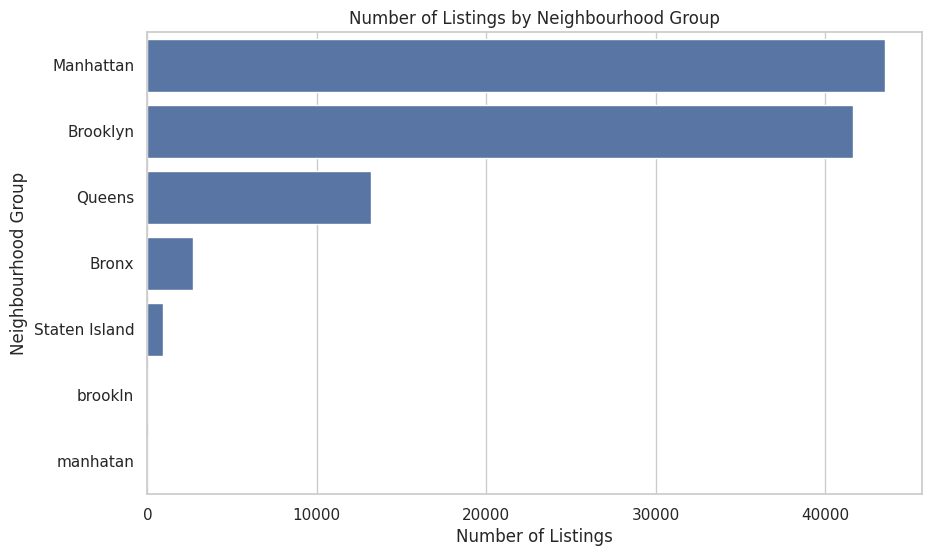

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(y='neighbourhood group', data=df, order = df['neighbourhood group'].value_counts().index)
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Number of Listings')
plt.ylabel('Neighbourhood Group')
plt.show()

# **Analyze the distribution of room types**

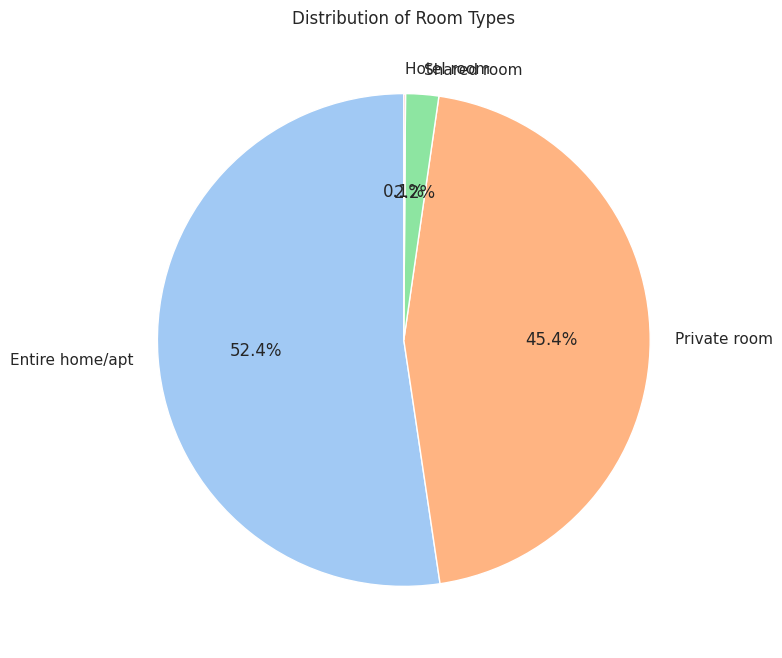

In [14]:

plt.figure(figsize=(8, 8))
df['room type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Room Types')
plt.ylabel('')
plt.show()

# **Analyze the price distribution**

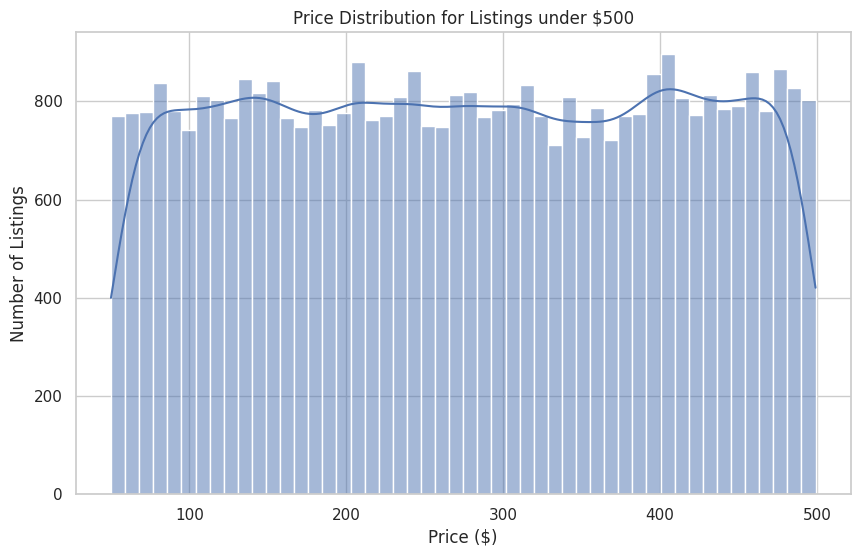

In [15]:

plt.figure(figsize=(10, 6))
sns.histplot(df[df['price'] < 500]['price'], bins=50, kde=True)
plt.title('Price Distribution for Listings under $500')
plt.xlabel('Price ($)')
plt.ylabel('Number of Listings')
plt.show()

# **Explore the relationship between price and other factors**

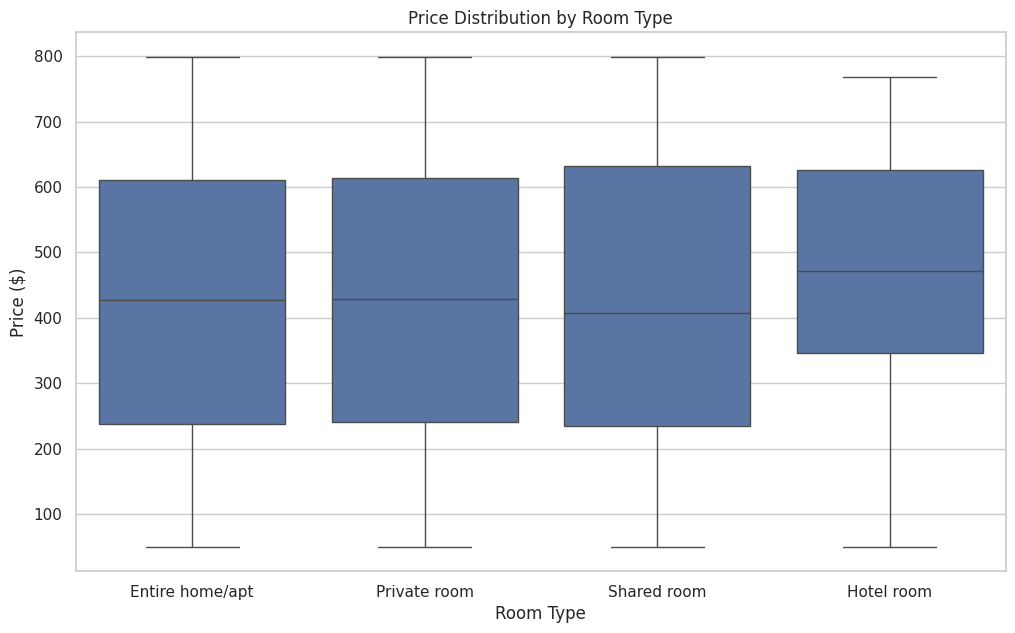

In [16]:

plt.figure(figsize=(12, 7))
sns.boxplot(x='room type', y='price', data=df[df['price'] < 800]) # Filtering for better visualization
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

# Correlation **Analysis** **bold text**

In [17]:
corr = df[['price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']].corr()

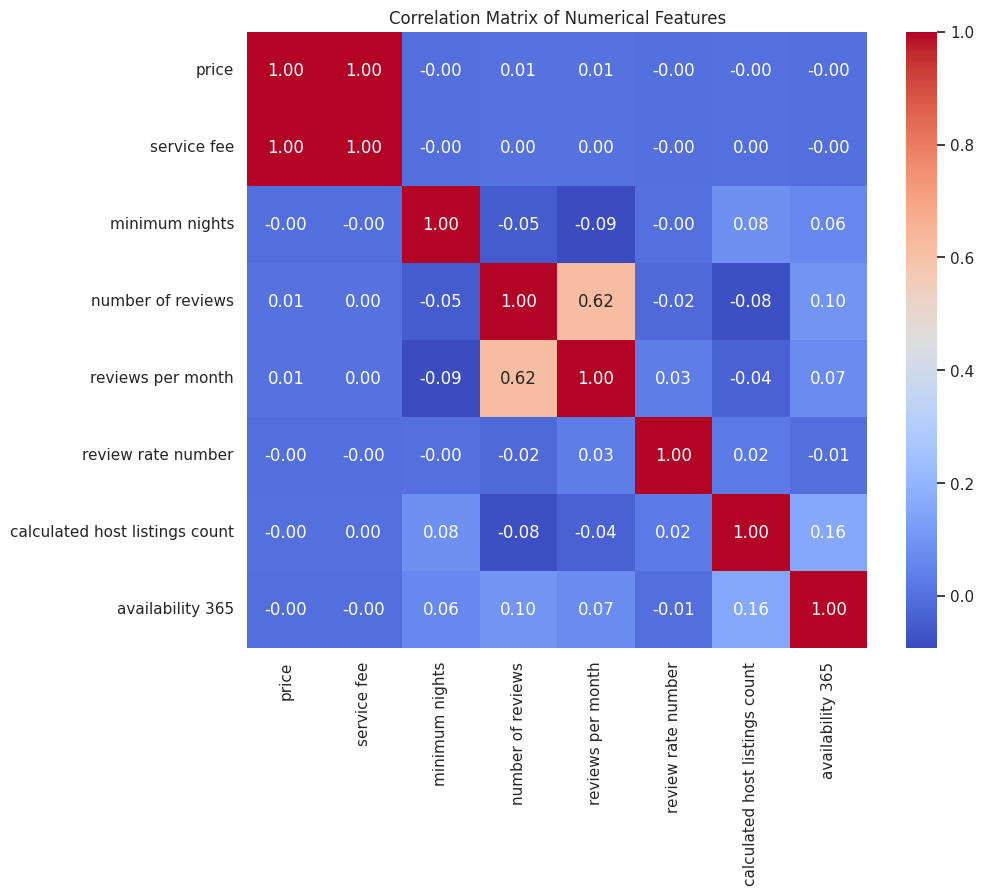

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Price Analysis by **Neighborhood**

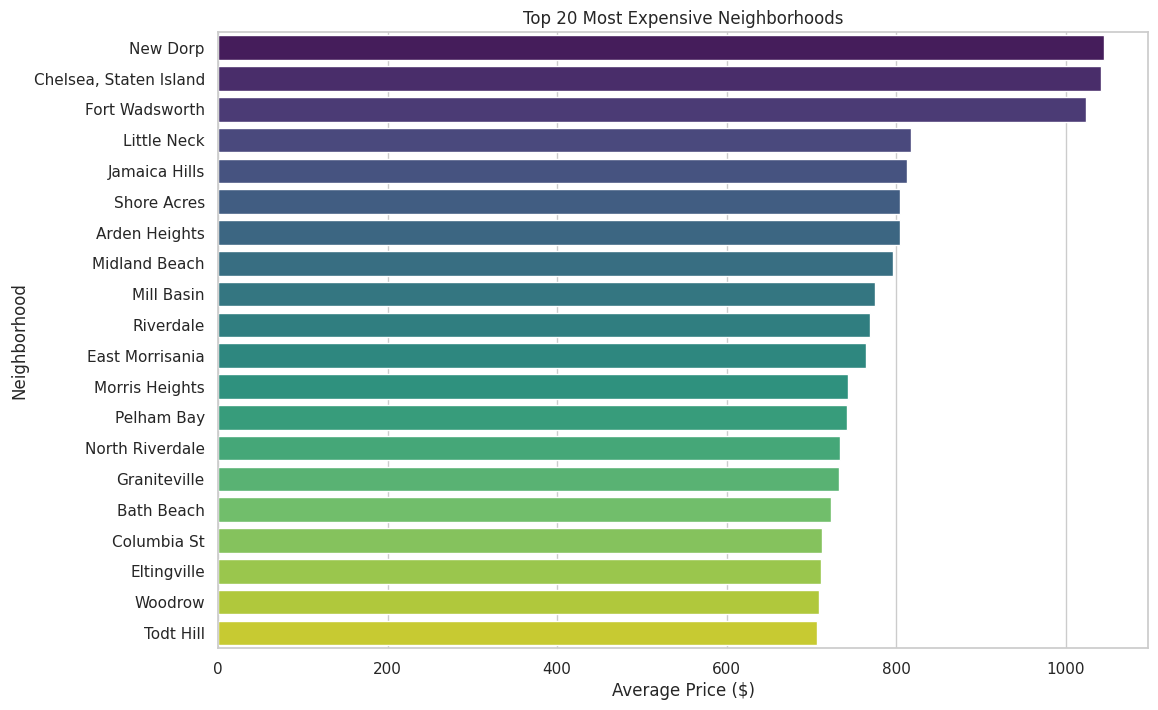

In [19]:

avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_by_neighborhood.values, y=avg_price_by_neighborhood.index, palette='viridis')
plt.title('Top 20 Most Expensive Neighborhoods')
plt.xlabel('Average Price ($)')
plt.ylabel('Neighborhood')
plt.show()

# **Availability Analysis**

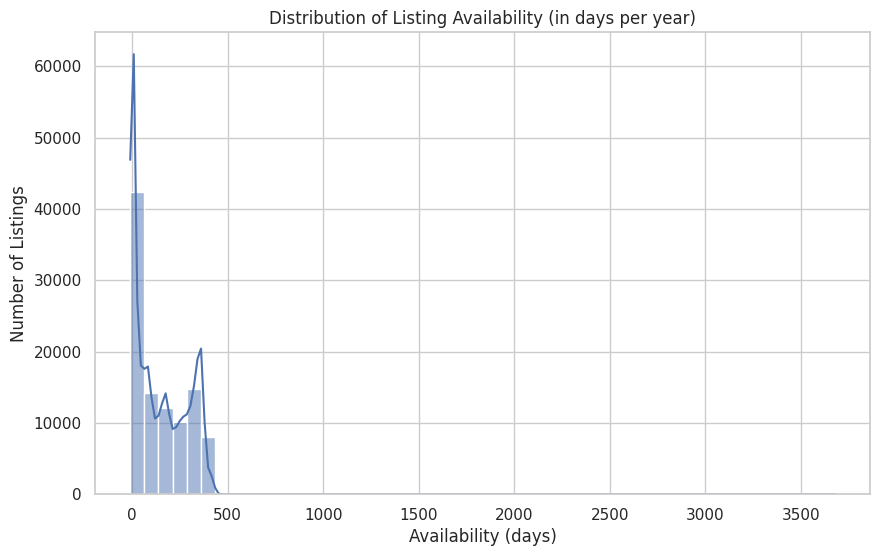

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['availability 365'], bins=50, kde=True)
plt.title('Distribution of Listing Availability (in days per year)')
plt.xlabel('Availability (days)')
plt.ylabel('Number of Listings')
plt.show()

# **Analyze the price distribution**

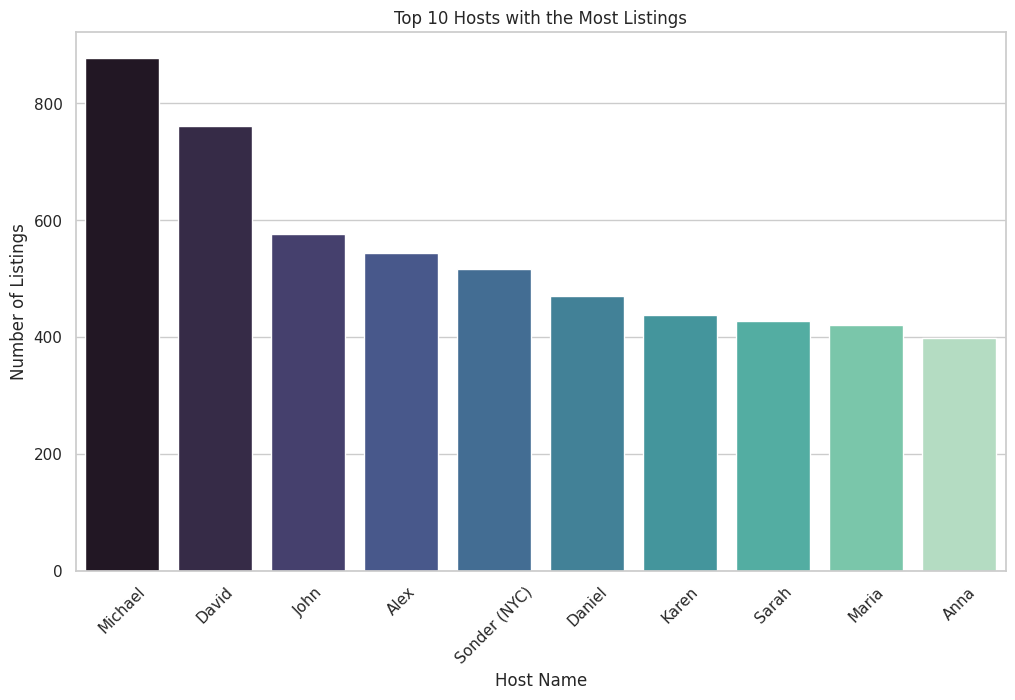

In [21]:
top_hosts = df['host name'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette='mako')
plt.title('Top 10 Hosts with the Most Listings')
plt.xlabel('Host Name')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()

# *Explore the relationship between price and other factors*

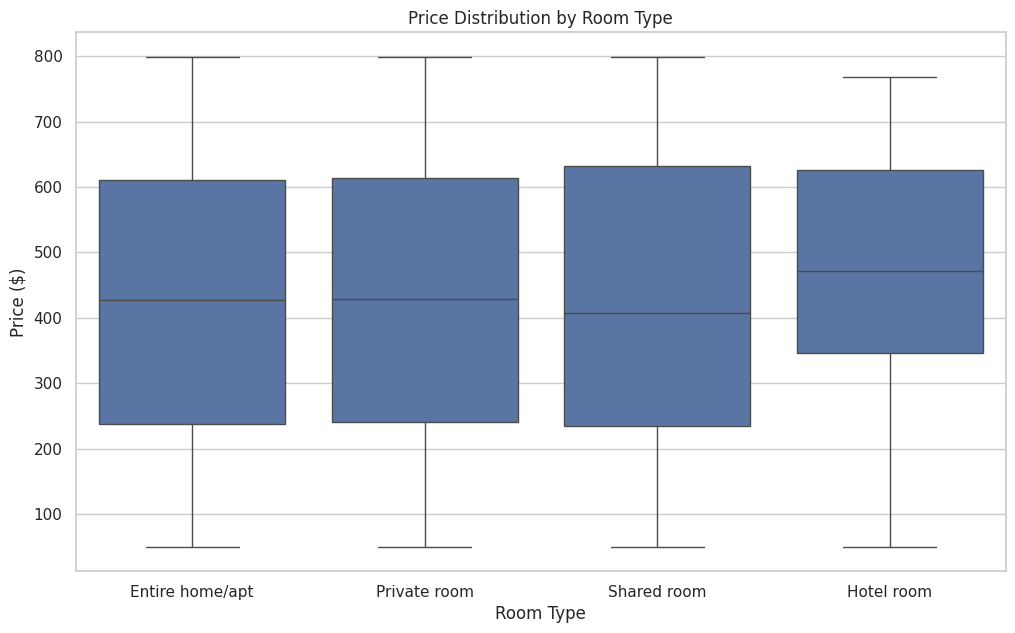

In [22]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='room type', y='price', data=df[df['price'] < 800]) # Filtering for better visualization
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()